In [10]:
%run "..\data_cleaning\data_preprocessing.ipynb"

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv("s3://data3001-racing/track_ratio.csv",index_col=0)
# this column is 1 if the point is on the track and 0 if it is not 
df["point_on_track"] = np.where(df["track_ratio_left"]+df["track_ratio_right"]<1.1, 1, 0)

In [13]:
left_df = clean_left()
right_df = clean_right()

In [14]:
filtered_df = df[(df["WORLDPOSX"] < 500) & (df["WORLDPOSX"] > 200) & (df["WORLDPOSY"] > -100)]
filtered_df = filtered_df[filtered_df["point_on_track"]==1]

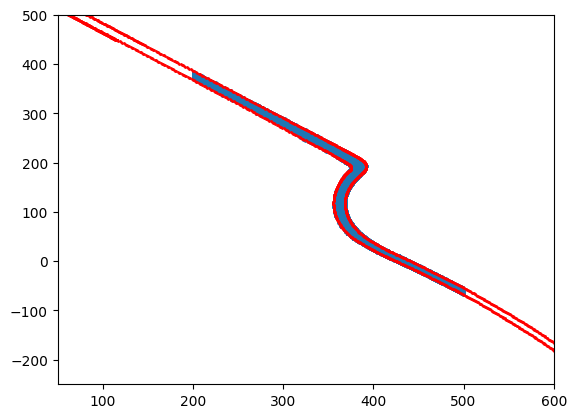

In [15]:
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"], alpha=1,s=1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.xlim(50, 600)
plt.ylim(-250, 500)
plt.show()

### Coordinate positions
- entry: x[200,350], y[200,400]
- inside: x[350,400], y[0,250]
- exit: x[400,500], y[-100,100]

In [16]:
import matplotlib.patches as patches

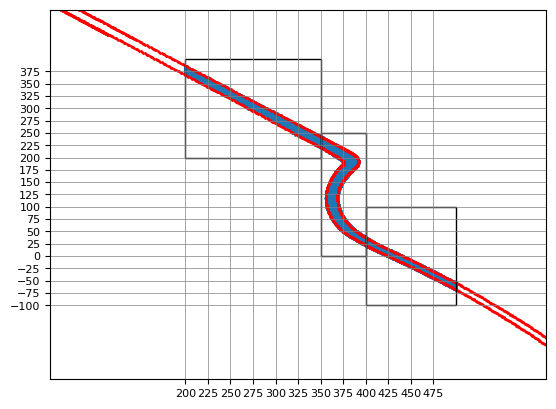

In [17]:
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"], alpha=1,s=1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')

x1, x2 = 200,350
y1, y2 = 200,400
box = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='black', facecolor='none')
plt.gca().add_patch(box)

x1, x2 = 350,400
y1, y2 = 0,250 
box = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='black', facecolor='none')
plt.gca().add_patch(box)

x1, x2 = 400,500
y1, y2 = -100,100
box = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='black', facecolor='none')
plt.gca().add_patch(box)

plt.xlim(50, 600)
plt.ylim(-250, 500)

plt.grid(True, color='gray', linewidth=0.5)

plt.xticks(range(200, 500, 25),fontsize=8)
plt.yticks(range(-100, 400, 25),fontsize=8)

plt.show()

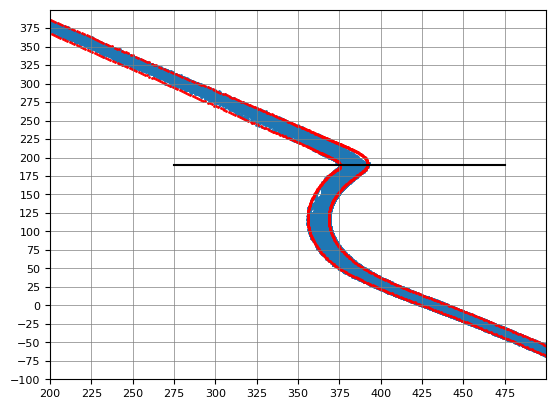

In [18]:
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"], alpha=1,s=1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.xlim(200, 500)
plt.ylim(-100, 400)


# Testing space, for the lines
m = 0
b = 190
x = np.linspace(275, 475, 100)
y = m * x + b
plt.plot(x, y, c="black")



plt.grid(True, color='gray', linewidth=0.5)
plt.xticks(range(200, 500, 25),fontsize=8)
plt.yticks(range(-100, 400, 25),fontsize=8)

plt.show()

In [19]:
y1 = 4*x-1150
y2 = 4*x-1182.5
y3 = 4*x-1215
y4 = 4*x-1247.5
y5 = 4*x-1280
y6 = 1.7*x-450
y7 = 0*x+190
y8 = -0.975*x+550
y9 = -0.975*x+535
y10 = -0.975*x+520
y11 = -0.975*x+505
y12 = -0.975*x+490
y13 = 0*x+125
y14 = 0*x+112.5
y15 = 0*x+100
y16 = 0.9*x-240
y17 = 0.9*x-250
y18 = 1*x-295
y19 = 1*x-305
y20 = 1.7*x-587
y21 = 1.7*x-598.5
y22 = 1.7*x-610
y23 = 4*x-1550
y24 = 4*x-1575
y25 = 4*x-1600

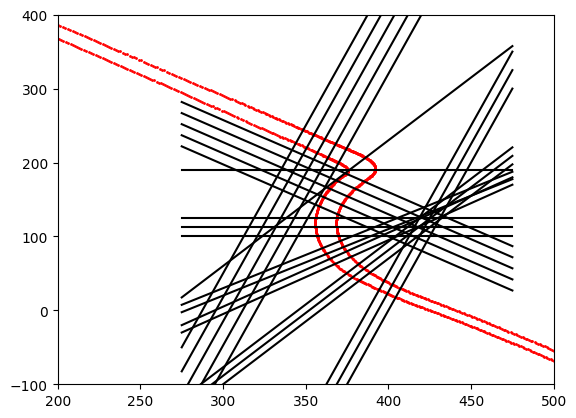

In [20]:
x = np.linspace(275, 475, 100)
plt.plot(x, y1,c='black', label='y1')
plt.plot(x, y2,c='black', label='y2')
plt.plot(x, y3,c='black', label='y3')
plt.plot(x, y4,c='black', label='y4')
plt.plot(x, y5,c='black', label='y5')
plt.plot(x, y6,c='black', label='y6')
plt.plot(x, y7,c='black', label='y7')
plt.plot(x, y8,c='black', label='y8')
plt.plot(x, y9,c='black', label='y9')
plt.plot(x, y10,c='black', label='y10')
plt.plot(x, y11,c='black', label='y11')
plt.plot(x, y12,c='black', label='y12')
plt.plot(x, y13,c='black', label='y13')
plt.plot(x, y14,c='black', label='y14')
plt.plot(x, y15,c='black', label='y15')
plt.plot(x, y16,c='black', label='y16')
plt.plot(x, y17,c='black', label='y17')
plt.plot(x, y18,c='black', label='y18')
plt.plot(x, y19,c='black', label='y19')
plt.plot(x, y20,c='black', label='y20')
plt.plot(x, y21,c='black', label='y21')
plt.plot(x, y22,c='black', label='y22')
plt.plot(x, y23,c='black', label='y23')
plt.plot(x, y24,c='black', label='y24')
plt.plot(x, y25,c='black', label='y25')
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.xlim(200, 500)
plt.ylim(-100, 400)
plt.show()

In [21]:
data = {'m': [4,4,4,4,4,1.7,0,-0.975,-0.975,-0.975,-0.975,-0.975,0,0,0,0.9,0.9,1,1,1.7,1.7,1.7,4,4,4],
        'b': [-1150,-1182.5,-1215,-1247.5,-1280,-450,190,550,535,520,505,490,125,112.5,100,-240,-250,-295,-305,-587,-598.5,-610,-1550,-1575,-1600]}
lines_df = pd.DataFrame(data)

In [22]:
lines_df

,m,b
0,4.000,-1150.0
1,4.000,-1182.5
2,4.000,-1215.0
3,4.000,-1247.5
4,4.000,-1280.0
5,1.700,-450.0
6,0.000,190.0
7,-0.975,550.0
8,-0.975,535.0
9,-0.975,520.0


In [23]:
filtered_df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y,track_width,track_ratio_left,track_ratio_right,point_on_track
29,1,1.003468e+19,1709,1,1,123.269333,1468,30129,18569,87226.0,38528.0,307.0,1.0,0.031952,8.0,11011.0,0.009110,-2.346334,0.004660,-0.030272,201.282669,381.607056,2.266734,-23396.0,-152.0,-22939.0,22926.0,991.0,-23389.0,2.550950,11.135762,"(203.239501953125, 383.2435607910156)","(194.27964782714844, 372.9489440917969)",203.239502,383.243561,194.279648,372.948944,13.647642,0.186915,0.815948,1
30,1,1.003468e+19,1710,1,1,127.548920,1518,30129,18569,87226.0,38528.0,308.0,1.0,0.030945,8.0,11023.0,0.002976,-2.347822,0.001766,-0.029964,204.342453,378.613342,2.244603,-23362.0,-57.0,-22974.0,22963.0,981.0,-23353.0,2.594678,11.071368,"(206.15982055664065, 380.4652404785156)","(196.74839782714844, 370.5569458007813)",206.159821,380.465240,196.748398,370.556946,13.665620,0.189869,0.810162,1
31,1,1.003468e+19,1711,1,1,131.838852,1568,30129,18569,87226.0,38528.0,308.0,1.0,0.030945,8.0,11043.0,-0.002884,-2.348564,0.003683,-0.029734,207.405945,375.608734,2.234237,-23345.0,-120.0,-22992.0,22979.0,974.0,-23338.0,2.669278,11.040806,"(209.08413696289065, 377.6844787597656)","(199.6254119873047, 367.7752990722656)",209.084137,377.684479,199.625412,367.775299,13.698880,0.194854,0.805964,1
32,1,1.003468e+19,1712,1,1,136.129898,1618,30129,18569,87226.0,38528.0,309.0,1.0,0.030945,8.0,11052.0,-0.003616,-2.348275,0.003093,-0.028072,210.467972,372.601074,2.218323,-23352.0,-101.0,-22985.0,22974.0,919.0,-23345.0,2.920416,11.023961,"(211.5960998535156, 375.2947998046875)","(203.3213348388672, 364.2074279785156)",211.596100,375.294800,203.321335,364.207428,13.834795,0.211092,0.796829,1
33,1,1.003468e+19,1713,1,1,140.429642,1668,30129,18569,87226.0,38528.0,309.0,1.0,0.032959,8.0,11066.0,-0.006546,-2.347550,0.005300,-0.026154,213.535660,369.586853,2.195027,-23368.0,-173.0,-22968.0,22957.0,856.0,-23364.0,2.974128,10.970134,"(216.1992950439453, 370.909912109375)","(206.18458557128903, 361.4440307617188)",216.199295,370.909912,206.184586,361.444031,13.780323,0.215824,0.796072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278068,1359,9.988606e+18,3216,2,1,687.343750,11311,32563,18983,91857.0,40311.0,255.0,1.0,0.000000,6.0,11680.0,0.024033,-2.320335,-0.005294,0.031179,487.998993,-55.019951,3.080892,-23985.0,173.0,-22323.0,22309.0,-1021.0,-23977.0,8.963004,1.035062,"(494.4578247070313, -48.80553817749024)","(487.2395324707031, -55.72320938110352)",494.457825,-48.805538,487.239532,-55.723209,9.997896,0.896489,0.103528,1
278069,1359,9.988606e+18,3218,2,1,690.916016,11361,32563,18983,91857.0,40311.0,256.0,1.0,0.000000,6.0,11736.0,0.057176,-2.324934,-0.003131,0.030839,490.592804,-57.458065,3.095754,-23882.0,102.0,-22434.0,22421.0,-1010.0,-23873.0,8.916624,1.226806,"(496.6664123535156, -50.92985916137695)","(490.2727355957031, -58.64238357543945)",496.666412,-50.929859,490.272736,-58.642384,10.018090,0.890052,0.122459,1
278070,1359,9.988606e+18,3219,2,1,694.507812,11411,32563,18983,91857.0,40311.0,257.0,1.0,0.000000,6.0,11628.0,0.044541,-2.334668,-0.004903,0.030071,493.190674,-59.918903,3.109276,-23662.0,160.0,-22665.0,22651.0,-985.0,-23655.0,8.891868,1.198306,"(498.8664245605469, -53.07411193847656)","(492.09759521484375, -60.40993881225586)",498.866425,-53.074112,492.097595,-60.409939,9.981553,0.890830,0.120052,1
278071,1359,9.988606e+18,3221,2,1,699.304199,11478,32563,18983,91857.0,40311.0,258.0,1.0,0.000000,7.0,10485.0,0.011032,-2.345181,-0.00

In [24]:
filtered_df['bin'] = -1

section_counter = 0

for row in lines_df.iterrows():
    m = lines_df["m"][section_counter]
    b = lines_df["b"][section_counter]
    
    condition = (filtered_df['WORLDPOSY'] > (m * filtered_df['WORLDPOSX'] + b)) & (filtered_df['bin'] == -1)
    filtered_df.loc[condition, 'bin'] = section_counter
    section_counter += 1

condition = (filtered_df['bin'] == -1)
filtered_df.loc[condition, 'bin'] = section_counter

In [25]:
filtered_df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y,track_width,track_ratio_left,track_ratio_right,point_on_track,bin
29,1,1.003468e+19,1709,1,1,123.269333,1468,30129,18569,87226.0,38528.0,307.0,1.0,0.031952,8.0,11011.0,0.009110,-2.346334,0.004660,-0.030272,201.282669,381.607056,2.266734,-23396.0,-152.0,-22939.0,22926.0,991.0,-23389.0,2.550950,11.135762,"(203.239501953125, 383.2435607910156)","(194.27964782714844, 372.9489440917969)",203.239502,383.243561,194.279648,372.948944,13.647642,0.186915,0.815948,1,0
30,1,1.003468e+19,1710,1,1,127.548920,1518,30129,18569,87226.0,38528.0,308.0,1.0,0.030945,8.0,11023.0,0.002976,-2.347822,0.001766,-0.029964,204.342453,378.613342,2.244603,-23362.0,-57.0,-22974.0,22963.0,981.0,-23353.0,2.594678,11.071368,"(206.15982055664065, 380.4652404785156)","(196.74839782714844, 370.5569458007813)",206.159821,380.465240,196.748398,370.556946,13.665620,0.189869,0.810162,1,0
31,1,1.003468e+19,1711,1,1,131.838852,1568,30129,18569,87226.0,38528.0,308.0,1.0,0.030945,8.0,11043.0,-0.002884,-2.348564,0.003683,-0.029734,207.405945,375.608734,2.234237,-23345.0,-120.0,-22992.0,22979.0,974.0,-23338.0,2.669278,11.040806,"(209.08413696289065, 377.6844787597656)","(199.6254119873047, 367.7752990722656)",209.084137,377.684479,199.625412,367.775299,13.698880,0.194854,0.805964,1,0
32,1,1.003468e+19,1712,1,1,136.129898,1618,30129,18569,87226.0,38528.0,309.0,1.0,0.030945,8.0,11052.0,-0.003616,-2.348275,0.003093,-0.028072,210.467972,372.601074,2.218323,-23352.0,-101.0,-22985.0,22974.0,919.0,-23345.0,2.920416,11.023961,"(211.5960998535156, 375.2947998046875)","(203.3213348388672, 364.2074279785156)",211.596100,375.294800,203.321335,364.207428,13.834795,0.211092,0.796829,1,0
33,1,1.003468e+19,1713,1,1,140.429642,1668,30129,18569,87226.0,38528.0,309.0,1.0,0.032959,8.0,11066.0,-0.006546,-2.347550,0.005300,-0.026154,213.535660,369.586853,2.195027,-23368.0,-173.0,-22968.0,22957.0,856.0,-23364.0,2.974128,10.970134,"(216.1992950439453, 370.909912109375)","(206.18458557128903, 361.4440307617188)",216.199295,370.909912,206.184586,361.444031,13.780323,0.215824,0.796072,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278068,1359,9.988606e+18,3216,2,1,687.343750,11311,32563,18983,91857.0,40311.0,255.0,1.0,0.000000,6.0,11680.0,0.024033,-2.320335,-0.005294,0.031179,487.998993,-55.019951,3.080892,-23985.0,173.0,-22323.0,22309.0,-1021.0,-23977.0,8.963004,1.035062,"(494.4578247070313, -48.80553817749024)","(487.2395324707031, -55.72320938110352)",494.457825,-48.805538,487.239532,-55.723209,9.997896,0.896489,0.103528,1,25
278069,1359,9.988606e+18,3218,2,1,690.916016,11361,32563,18983,91857.0,40311.0,256.0,1.0,0.000000,6.0,11736.0,0.057176,-2.324934,-0.003131,0.030839,490.592804,-57.458065,3.095754,-23882.0,102.0,-22434.0,22421.0,-1010.0,-23873.0,8.916624,1.226806,"(496.6664123535156, -50.92985916137695)","(490.2727355957031, -58.64238357543945)",496.666412,-50.929859,490.272736,-58.642384,10.018090,0.890052,0.122459,1,25
278070,1359,9.988606e+18,3219,2,1,694.507812,11411,32563,18983,91857.0,40311.0,257.0,1.0,0.000000,6.0,11628.0,0.044541,-2.334668,-0.004903,0.030071,493.190674,-59.918903,3.109276,-23662.0,160.0,-22665.0,22651.0,-985.0,-23655.0,8.891868,1.198306,"(498.8664245605469, -53.07411193847656)","(492.09759521484375, -60.40993881225586)",498.866425,-53.074112,492.097595,-60.409939,9.981553,0.890830,0.120052,1,25
278071,1359,9.988606e+18,3221,2,1,699.304199,11478,32563,18983,91857.0,40311.0,258.0,1.0,0.000000,7.0,10485

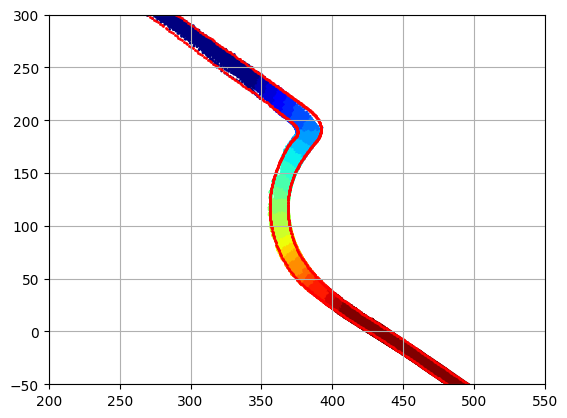

In [34]:
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"], c=filtered_df["bin"], cmap='jet', alpha=1,s=1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.xlim(200, 550)
plt.ylim(-50, 300)
plt.grid()
# plt.colorbar()
plt.show()

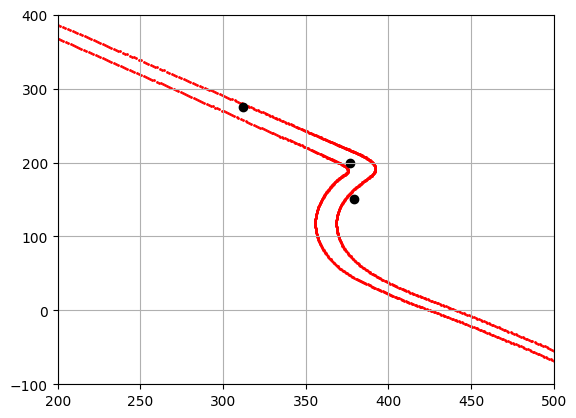

In [27]:
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.scatter(312,275, c='black')
plt.scatter(377,199, c='black')
plt.scatter(379,150, c='black')
plt.xlim(200, 500)
plt.ylim(-100, 400)
plt.grid()
plt.show()